#IMPORT MODULES

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.linear_model import LogisticRegression
import os
import warnings
warnings.filterwarnings("ignore")

#LOAD DATASET

In [22]:
df=pd.read_csv("state_weather_aqi_data_mf2.csv")
df

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",07-01-2020,03:00:00,163,142,57,7,10,39,8,163,PM2.5
1561,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",07-01-2020,03:00:00,279,215,78,11,23,31,53,279,PM2.5
1562,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",07-01-2020,03:00:00,162,136,43,4,16,34,44,162,PM2.5
1563,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",07-01-2020,03:00:00,213,152,55,5,11,95,64,213,PM2.5


#EXPLORATORY DATA ANALYSIS

In [23]:
df.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1565 non-null   object
 1   city                   1565 non-null   object
 2   station                1565 non-null   object
 3   date                   1565 non-null   object
 4   time                   1565 non-null   object
 5   PM2.5                  1565 non-null   int64 
 6   PM10                   1565 non-null   int64 
 7   NO2                    1565 non-null   int64 
 8   NH3                    1565 non-null   int64 
 9   SO2                    1565 non-null   int64 
 10  CO                     1565 non-null   int64 
 11  OZONE                  1565 non-null   int64 
 12  AQI                    1565 non-null   int64 
 13  Predominant_Parameter  1565 non-null   object
dtypes: int64(8), object(6)
memory usage: 171.3+ KB


In [25]:
df.isnull().sum()

state                    0
city                     0
station                  0
date                     0
time                     0
PM2.5                    0
PM10                     0
NO2                      0
NH3                      0
SO2                      0
CO                       0
OZONE                    0
AQI                      0
Predominant_Parameter    0
dtype: int64

In [26]:
df.describe()

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,182.016613,146.513099,46.641534,8.566134,16.426198,51.463898,30.003195,188.400639
std,104.352717,71.436006,30.414232,5.119818,11.949508,27.553078,21.881496,98.924827
min,9.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
25%,92.000000,94.000000,25.000000,4.000000,9.000000,31.000000,14.000000,101.000000
50%,167.000000,135.000000,43.000000,8.000000,14.000000,47.000000,26.000000,175.000000
75%,277.000000,197.000000,62.000000,12.000000,20.000000,66.000000,41.000000,278.000000
max,441.000000,394.000000,247.000000,34.000000,92.000000,200.000000,206.000000,441.000000


In [27]:
df.shape

(1565, 14)

In [28]:
df=df.drop(['time','date'],axis=True)
df

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",60,55,20,5,18,29,53,60,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1560,West_Bengal,Kolkata,"Jadavpur, Kolkata - WBPCB",163,142,57,7,10,39,8,163,PM2.5
1561,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",279,215,78,11,23,31,53,279,PM2.5
1562,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",162,136,43,4,16,34,44,162,PM2.5
1563,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",213,152,55,5,11,95,64,213,PM2.5


In [29]:
print(df.columns)


Index(['state', 'city', 'station', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO',
       'OZONE', 'AQI', 'Predominant_Parameter'],
      dtype='object')


#VISUALIZATION

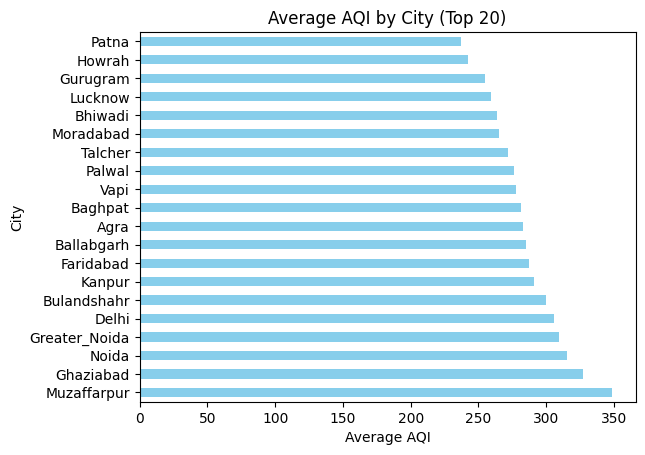

In [30]:
aqi_by_city = df.groupby('city')['AQI'].mean().sort_values(ascending=False)
aqi_by_city.head(20).plot(kind='barh', color='skyblue')
plt.ylabel('City')
plt.xlabel('Average AQI')
plt.title('Average AQI by City (Top 20)')
plt.show()

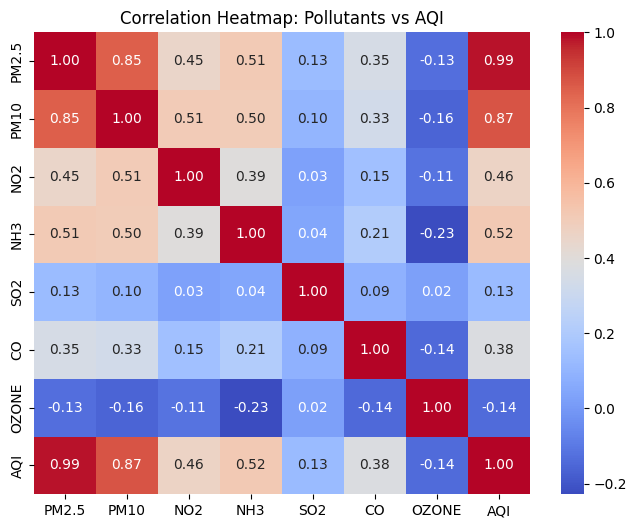

In [31]:
import seaborn as sns

corr = df[['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'OZONE', 'AQI']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Pollutants vs AQI')
plt.show()

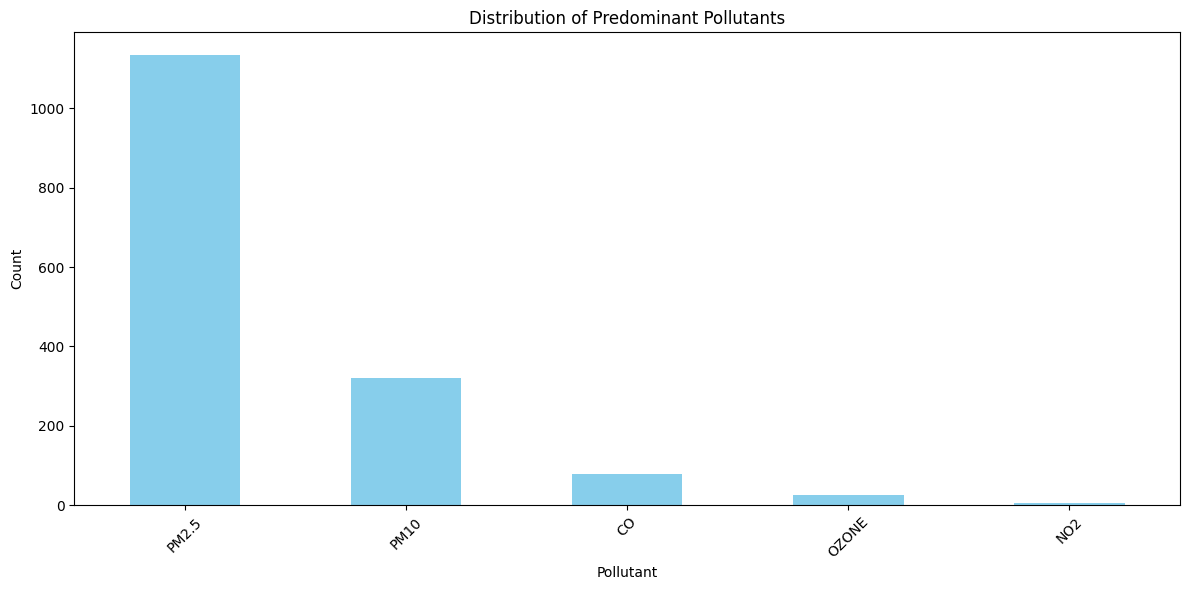

In [32]:
plt.figure(figsize=(12,6))
df['Predominant_Parameter'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Predominant Pollutants')
plt.xlabel('Pollutant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()

In [34]:
df['state']=label1.fit_transform(df['state'])
df['city']=label2.fit_transform(df['city'])
df['station']=label3.fit_transform(df['station'])
df['Predominant_Parameter']=label4.fit_transform(df['Predominant_Parameter'])

#Seperate Feature and Target

In [35]:
x=df.drop('AQI',axis=1)
y=df.AQI

In [36]:
x.head()

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter
0,0,4,150,68,64,17,4,28,31,40,4
1,0,86,4,67,70,23,2,13,49,77,2
2,0,100,182,32,64,26,5,6,19,16,4
3,0,106,47,93,93,31,3,9,57,61,3
4,0,4,150,60,55,20,5,18,29,53,4


In [37]:
y.head()

0    68
1    77
2    32
3    93
4    60
Name: AQI, dtype: int64

# TRAIN -TEST -SPLIT

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=43)

In [39]:
xtrain.head()

,state,city,station,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter
835,10,44,30,90,107,80,5,13,28,42,3
57,2,83,145,238,150,36,9,14,48,50,4
1559,18,58,44,247,167,67,5,12,43,55,4
447,6,11,8,167,106,69,7,13,65,27,4
268,4,26,133,256,205,86,6,18,37,17,4


In [40]:
ytrain.head()

835     107
57      239
1559    247
447     167
268     256
Name: AQI, dtype: int64

In [41]:
print(xtrain.shape,ytrain.shape,xtest.shape)

(1173, 11) (1173,) (392, 11)


#LINEAR REGRESSOR

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [44]:
y_pred = model1.predict(xtest)

In [45]:
print("Linear Regression")
print("MAE:", mean_absolute_error(ytest, y_pred))
print("MSE:", mean_squared_error(ytest, y_pred))
print("R2 Score:", r2_score(ytest, y_pred))

Linear Regression
MAE: 9.006292405043027
MSE: 204.6583553071931
R2 Score: 0.9801768650038688


In [1]:
#DECISIONTREE REGRESSOR

In [46]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(xtrain, ytrain)

DecisionTreeRegressor(random_state=42)

In [47]:
y_pred = model2.predict(xtest)

In [48]:
print("MAE:", mean_absolute_error(ytest, y_pred))
print("MSE:", mean_squared_error(ytest, y_pred))
print("R2 Score:", r2_score(ytest, y_pred))

MAE: 1.8061224489795917
MSE: 26.142857142857142
R2 Score: 0.9974678122202754


#RANDOM FOREST REGRESSOR

In [49]:
model3 = RandomForestRegressor(random_state=42)
model3.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [50]:
y_pred = model3.predict(xtest)

In [51]:
print("Random Forest Regressor")
print("MAE:", mean_absolute_error(ytest, y_pred))
print("RMSE:", mean_squared_error(ytest, y_pred))
print("R2 Score:", r2_score(ytest, y_pred))

Random Forest Regressor
MAE: 1.8229846938775514
RMSE: 23.941017091836738
R2 Score: 0.9976810816590224


In [53]:
# model4 = GradientBoostingRegressor()
# model4.fit(xtrain, ytrain)
# y_pred = model4.predict(xtest)

GradientBoostingRegressor()

In [34]:
# y_pred = model4.predict(xtest)

In [35]:
# print("Gradient Boosting Regressor")
# print("MAE:", mean_absolute_error(ytest, y_pred))
# print("RMSE:", mean_squared_error(ytest, y_pred))
# print("R2 score:",r2_score(ytest,y_pred))

Gradient Boosting Regressor
MAE: 3.458113495167959
RMSE: 36.124883879191636
R2 score: 0.9965009566856828


# MAKING PREDICTION SYSTEM

In [36]:
input_data=(45.0,100.0,30.0,15.0,10.0,1.0,25.0,2,4,10,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
prediction=model3.predict(input_data_reshape)
print("Predicted AQI:", prediction)

Predicted AQI: [30.5]


#save the model to pickle

In [37]:
import pickle

In [38]:
filename = 'trained_aqi_model.pkl'
pickle.dump(model3, open(filename, 'wb'))

In [39]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestRegressor(random_state=42)

### USER INTERFACE

In [40]:
states = sorted(df['state'].dropna().unique())
cities = sorted(df['city'].dropna().unique())
stations = sorted(df['station'].dropna().unique())
Predominant_Parameter = sorted(df['Predominant_Parameter'].dropna().unique())


In [45]:
import gradio as gr

#load the trained model
model=pickle.load(open(filename,'rb'))

#define prediction function
def predict_aqi(
    state,city,station,PM2_5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter
):
    input_data=np.array([state,city,station,PM2_5,PM10,NO2,NH3,SO2,CO,OZONE,Predominant_Parameter]).reshape(1,-1)

    prediction=model.predict(input_data)
    return float(prediction[0])

iface=gr.Interface(
    fn=predict_aqi,
    inputs=[
        gr.Dropdown(choices=states, label="State"),
        gr.Dropdown(choices=cities, label="City"),
        gr.Dropdown(choices=stations, label="Station"),
        gr.Number(label="PM2.5"),
        gr.Number(label="PM10"),
        gr.Number(label="NO2"),
        gr.Number(label="NH3"),
        gr.Number(label="SO2"),
        gr.Number(label="CO"),
        gr.Number(label="OZONE"),
        gr.Dropdown(choices=Predominant_Parameter,label="Predominant_Parameter"),
    ],

    outputs='text',
    title="Air Quality Index (AQI) Prediction"
)

iface.launch()
    

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
